# Import Modules and Read in Dataset

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

current_dir = os.getcwd()
data_path = os.path.join(current_dir, "store_complains_DS_Interview_Data_Set.csv")
dataset = pd.read_csv(data_path)

In [3]:
print(f"Size of data: {len(dataset)}")
nrow, ncol = dataset.shape
print(f"Number of datapoints: {nrow}, Number of variables: {ncol}")
dataset.head(5)


Size of data: 31924
Number of datapoints: 31924, Number of variables: 22


,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,...,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
0,64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,...,0,YES,Other,1.0,1.0,Visa,No,no,49,Female
1,64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,...,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female
2,642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,...,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male
3,642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,...,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
4,642580469a53006421b72c42,Alcohol,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,...,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31924 entries, 0 to 31923
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_registration_number  31924 non-null  object 
 1   merchandize_category          26843 non-null  object 
 2   amount_deposited_via_counter  31924 non-null  float64
 3   amount_deposited_via_card     31924 non-null  float64
 4   balance_on_complaign_date     31924 non-null  float64
 5   transaction_date              31924 non-null  object 
 6   complaint_date                31924 non-null  object 
 7   restaurant_points             31924 non-null  int64  
 8   fuel_points                   31924 non-null  int64  
 9   groceries_points              31924 non-null  int64  
 10  toys_points                   31924 non-null  int64  
 11  cash_back_points              31924 non-null  int64  
 12  electronics                   31924 non-null  int64  
 13  c

# Data Cleaning

- For this section, I applied the *to_numeric* method on numeric variables.

In [2]:
numeric_columns = ['amount','quantity','amount_deposited_via_counter','amount_deposited_via_card','balance_on_complaign_date']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)
dataset.info()

pd.set_option('display.float_format', '{:.2f}'.format)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31924 entries, 0 to 31923
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_registration_number  31924 non-null  object 
 1   merchandize_category          26843 non-null  object 
 2   amount_deposited_via_counter  31924 non-null  float64
 3   amount_deposited_via_card     31924 non-null  float64
 4   balance_on_complaign_date     31924 non-null  float64
 5   transaction_date              31924 non-null  object 
 6   complaint_date                31924 non-null  object 
 7   restaurant_points             31924 non-null  int64  
 8   fuel_points                   31924 non-null  int64  
 9   groceries_points              31924 non-null  int64  
 10  toys_points                   31924 non-null  int64  
 11  cash_back_points              31924 non-null  int64  
 12  electronics                   31924 non-null  int64  
 13  c

#  Exploratory Data Analysis (EDA)

This section of the notebook conducts EDA on the given dataset, to gain a better understanding of the data.

## Target variable: complaints

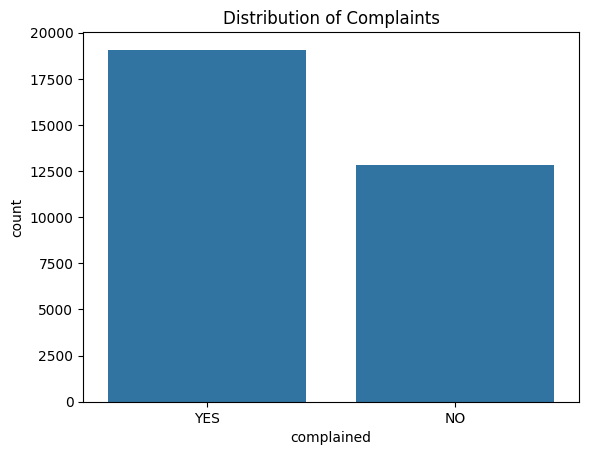

In [3]:
# Distribution of the Target Variable (complained)
sns.countplot(x='complained', data=dataset)
plt.title('Distribution of Complaints')
plt.show()

In [7]:
stats_columns = ['quantity','amount','amount_deposited_via_counter','amount_deposited_via_card','balance_on_complaign_date','cust_age']
dataset[stats_columns].describe()

,quantity,amount,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,cust_age
count,31675.00,31711.00,31924.00,31924.00,31924.00,31924.00
mean,3.14,3136569.74,113725.18,674415.12,680655.40,49.37
std,4.78,328769995.23,4752873.47,6580390.53,6771707.47,28.83
min,1.00,1.00,-5900.00,-199679.26,-11567.00,0.00
25%,1.00,1.00,0.00,4100.00,1140.00,25.00
50%,1.00,1.00,0.00,4100.00,4793.50,49.00
75%,3.25,26000.00,0.00,104100.00,122153.75,75.00
max,155.00,50154406000.00,700000000.00,700000000.00,700000000.00,99.00


- I am working under the asusmptions that the variables: amount_deposited_via_counter and amount_deposited_via_card should not be negative values as these values represent deposits; therefore it is does not make sense for an individual to deposit a negative amount. Therefore, I am replacing the negative values of the variables mentioned earlier, with their absolute values. 

In [8]:
columns_to_replace_with_abs_val = ['amount_deposited_via_counter', 'amount_deposited_via_card']

# Replace negative values with their absolute values
dataset[columns_to_replace_with_abs_val] = dataset[columns_to_replace_with_abs_val].abs()

In [9]:
def univariate(df,col,vartype,hue =None):    
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.show()

## Numerical Variables

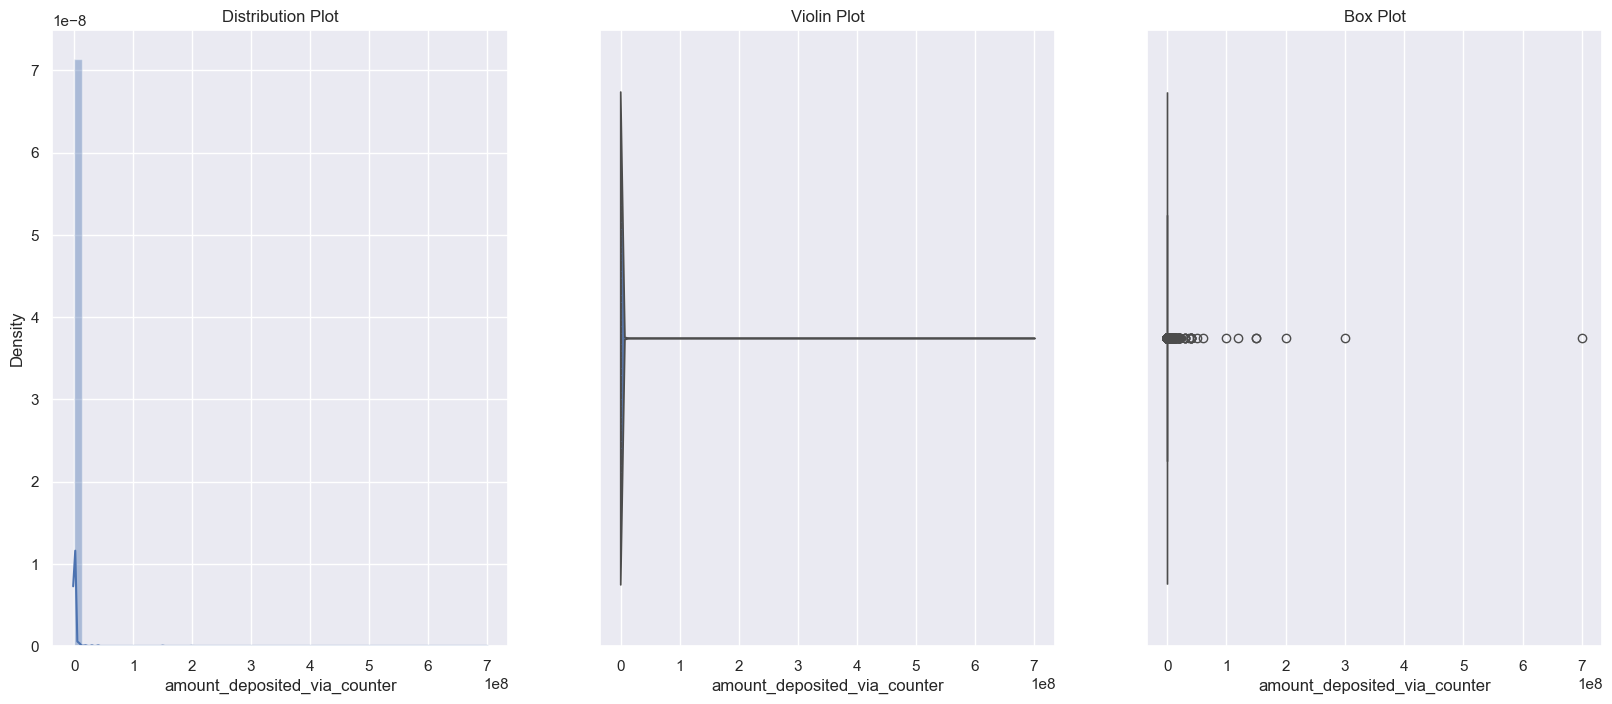

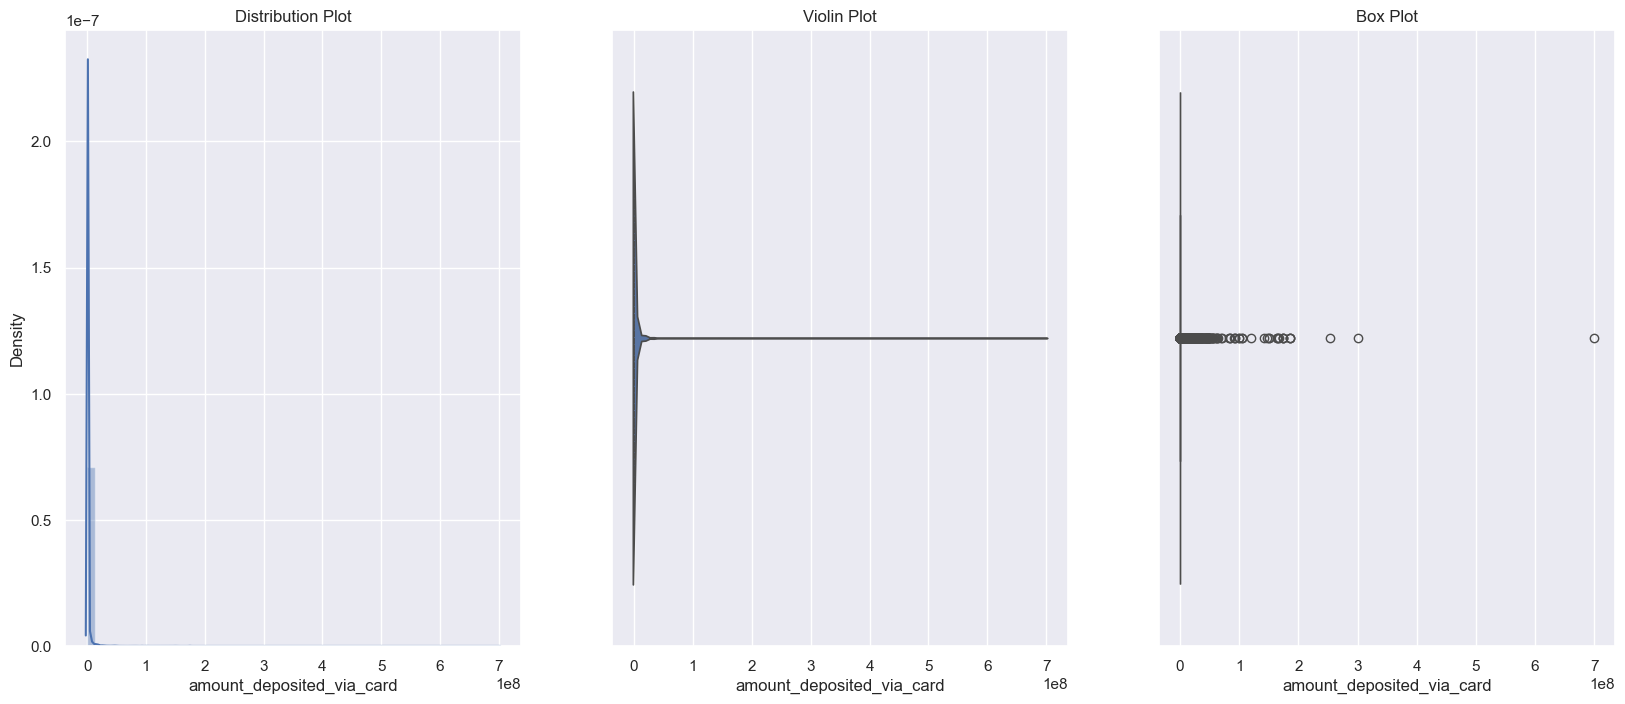

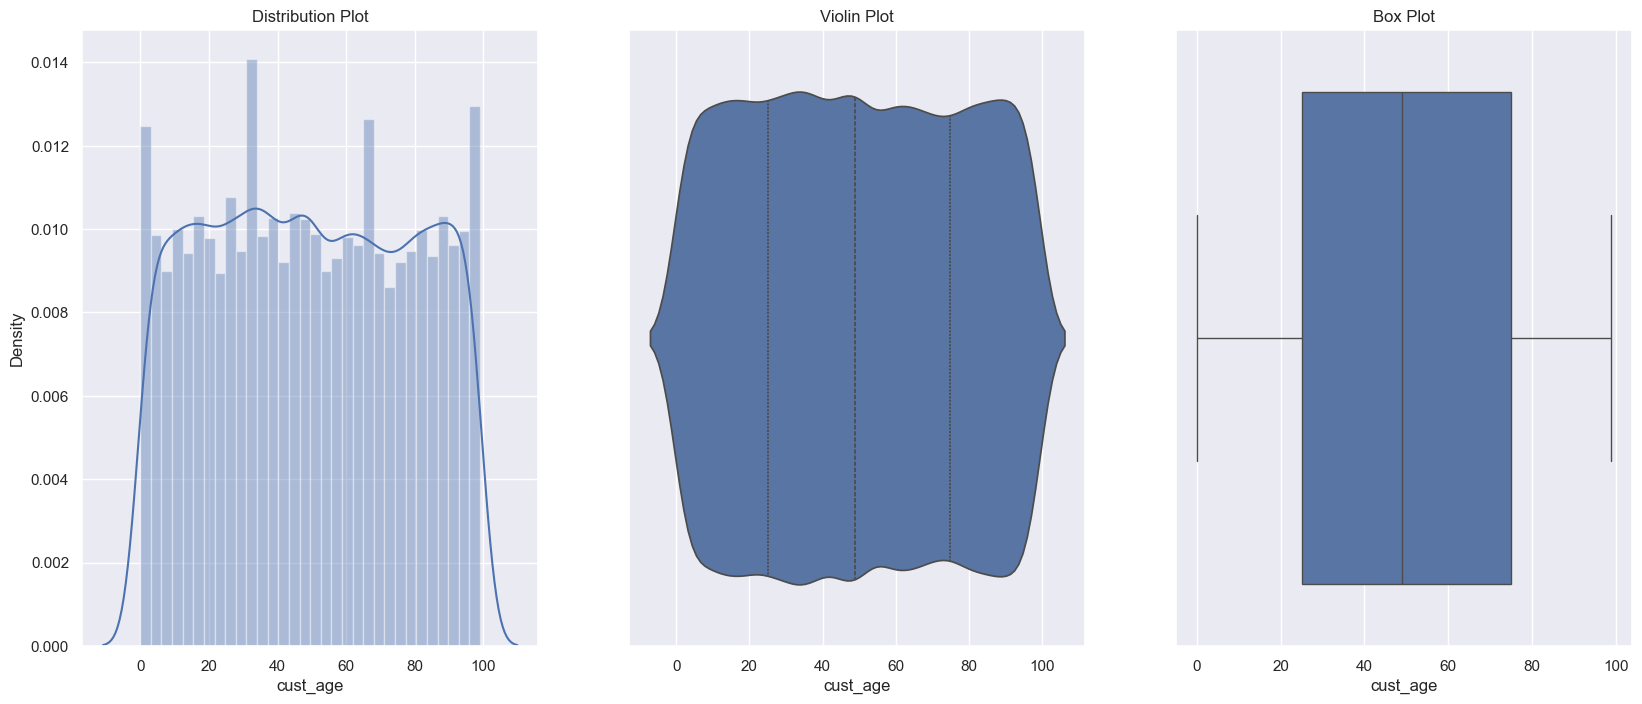

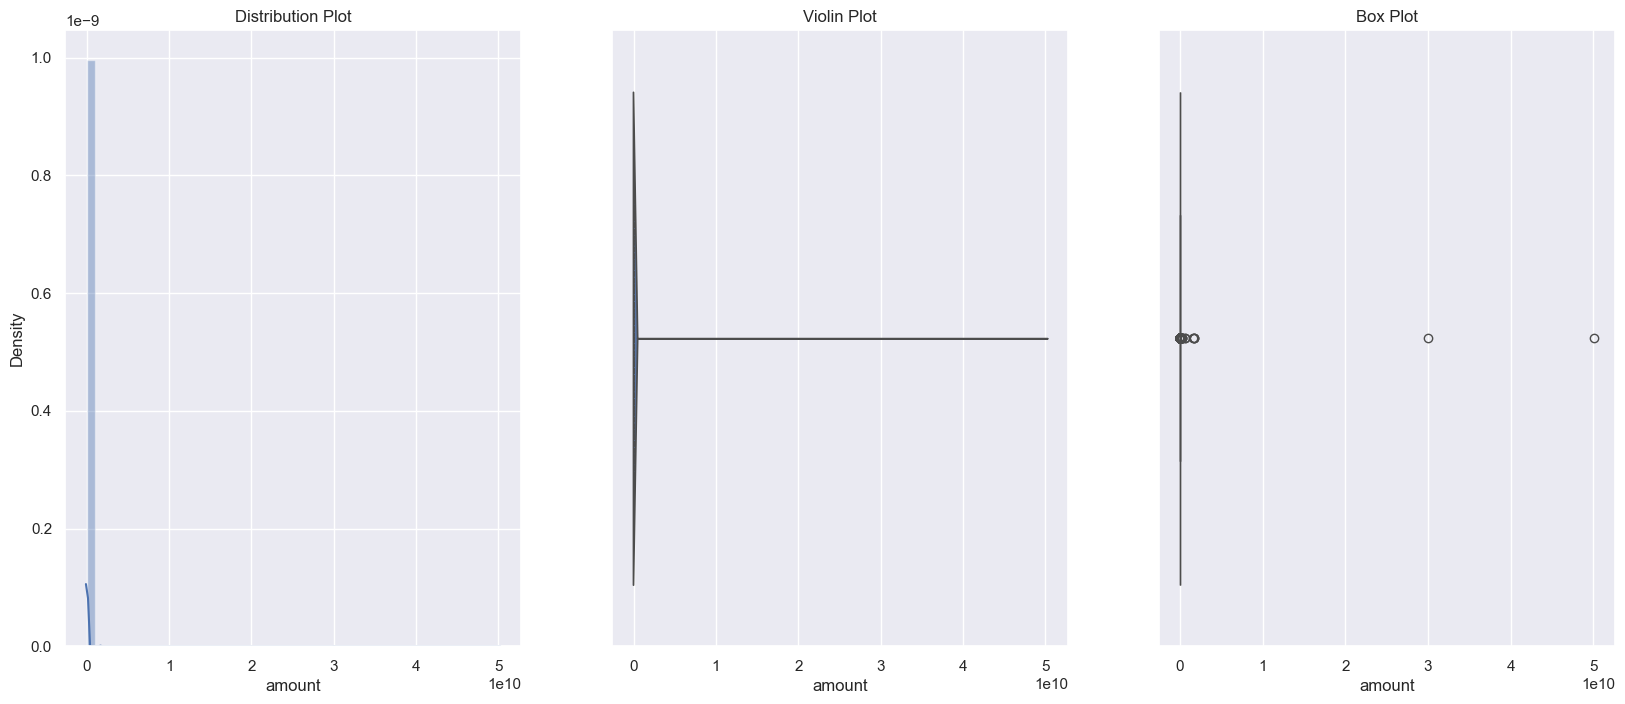

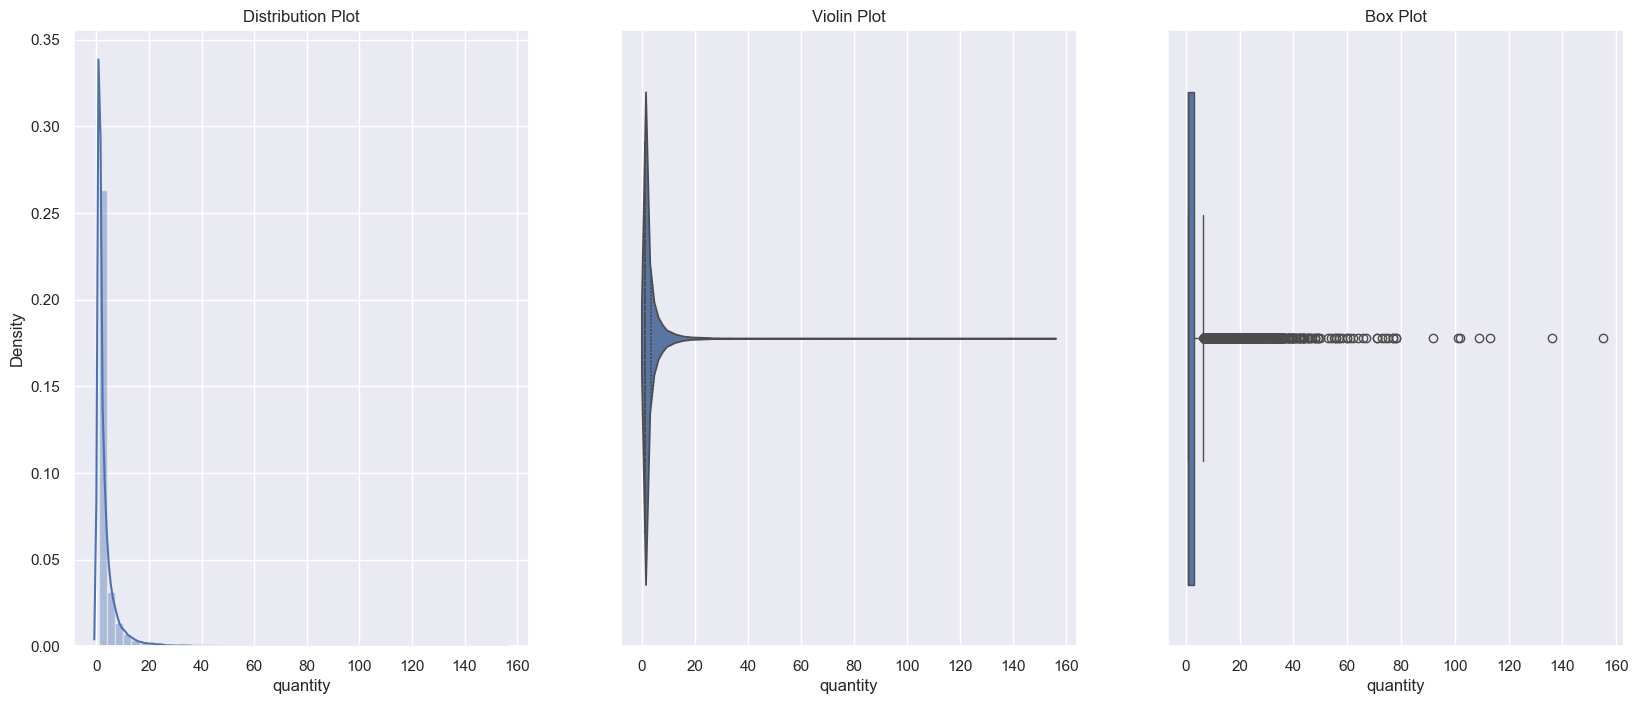

In [10]:
univariate(dataset,'amount_deposited_via_counter',0)
univariate(dataset,'amount_deposited_via_card',0)
univariate(dataset,'cust_age',0)
univariate(dataset,'amount',0)
univariate(dataset,'quantity',0)

### Insights form numerical univariate analysis

- amount, amount_deposited_via_counter & amount_deposited_via_card are highly influenced outliers. There are several ways to handle outliers; however for this part I am choosing to remove outliers from the dataset, based on values surpassing a certain percentile.

- *cust_age* variable data is spread out and its distribution closely resembles a normal distribution.

- *quantity* variable's distirbution is positively skewed.

In [4]:
# Assuming your DataFrame is named 'dataset'
columns_with_outliers = ['amount', 'amount_deposited_via_counter', 'amount_deposited_via_card']

# Define the desired percentile
percentile_threshold = 0.98

# Calculate the threshold value for each column
threshold_values = dataset[columns_with_outliers].quantile(percentile_threshold)
threshold_values

# Filter rows where values are below the threshold for each column
filtered_dataset = dataset[
    (dataset['amount'] <= threshold_values['amount']) &
    (dataset['amount_deposited_via_counter'] <= threshold_values['amount_deposited_via_counter']) &
    (dataset['amount_deposited_via_card'] <= threshold_values['amount_deposited_via_card'])
]

In [5]:
univariate(filtered_dataset,'amount_deposited_via_counter',0)
univariate(filtered_dataset,'amount_deposited_via_card',0)
univariate(filtered_dataset,'amount',0)

NameError: name 'univariate' is not defined

In [13]:
print(f"Number of data points removed due to setting a percentile threshold: {len(dataset)-len(filtered_dataset)}")

Number of data points removed due to setting a percentile threshold: 1823


## Categorical variables

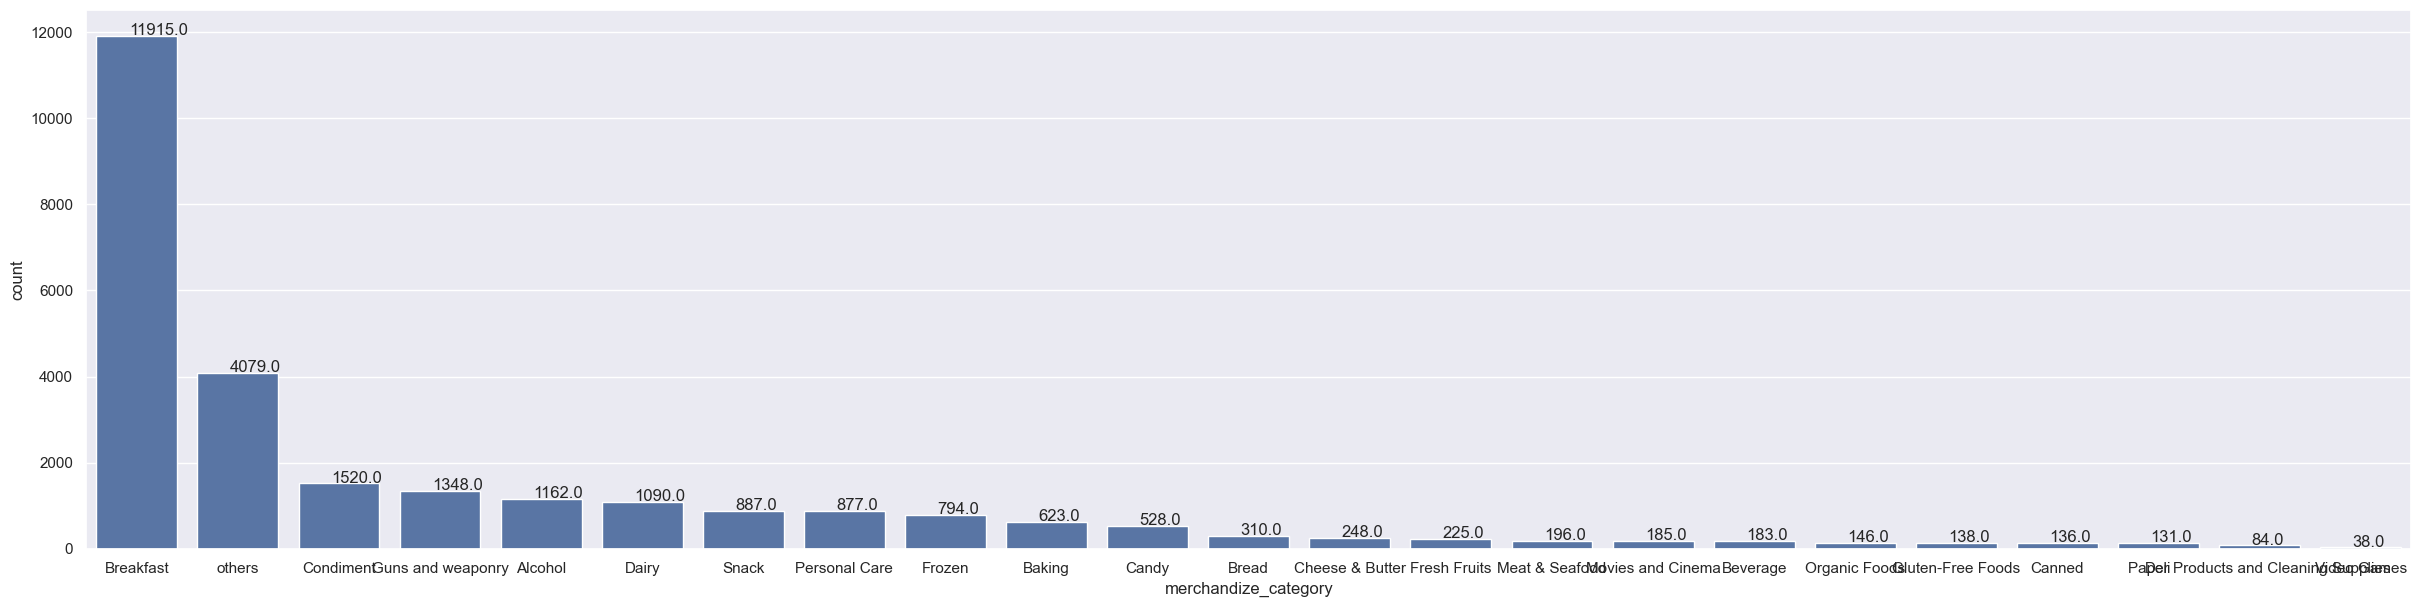

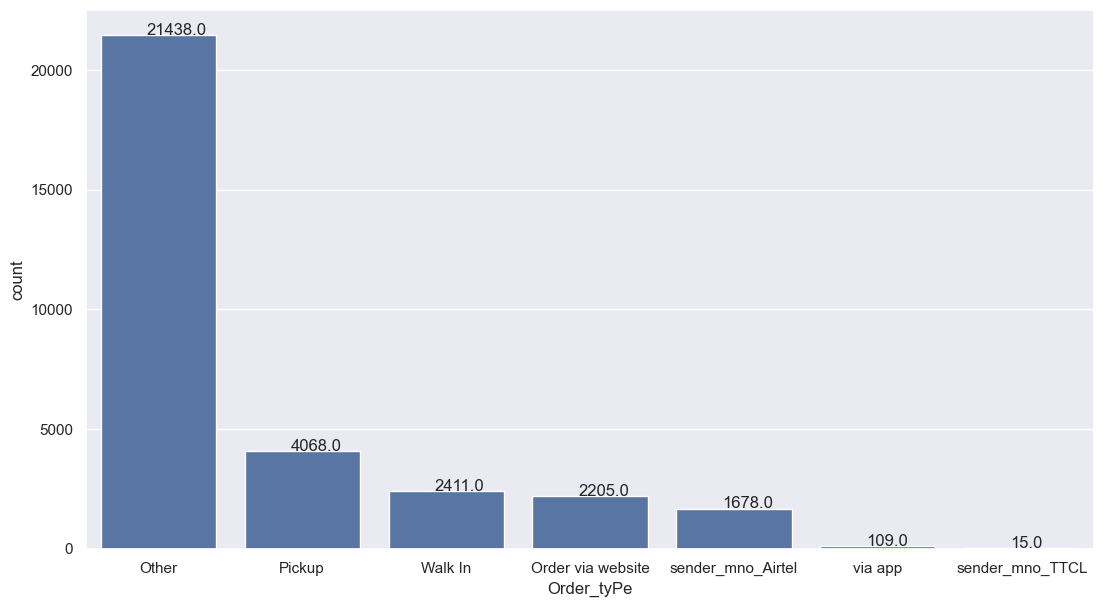

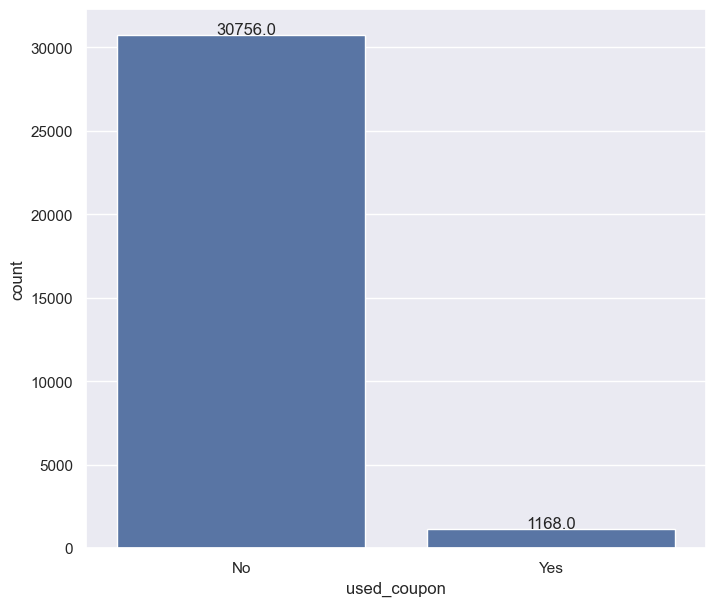

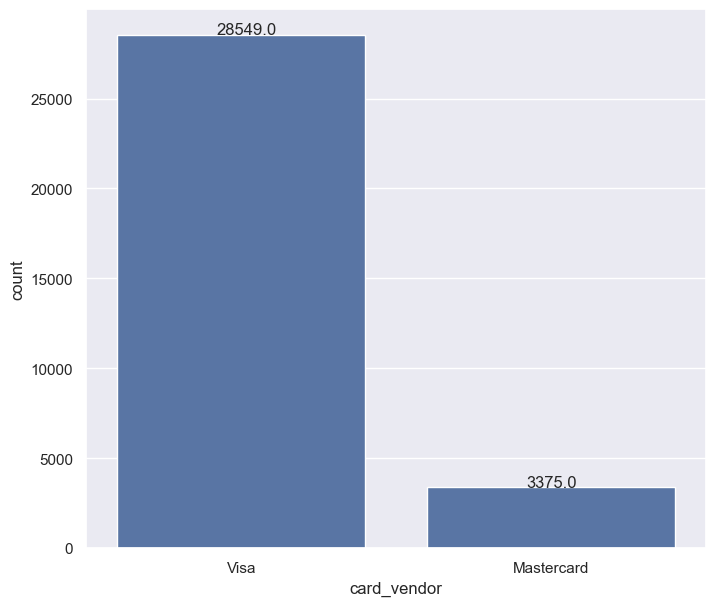

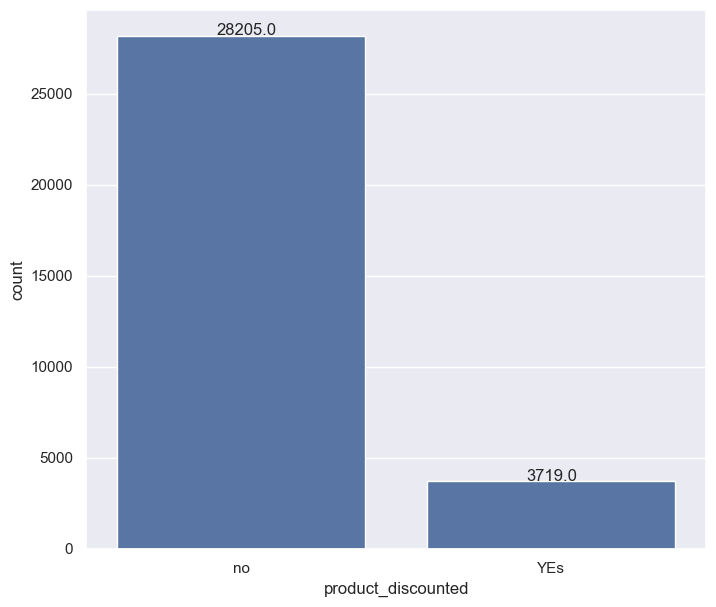

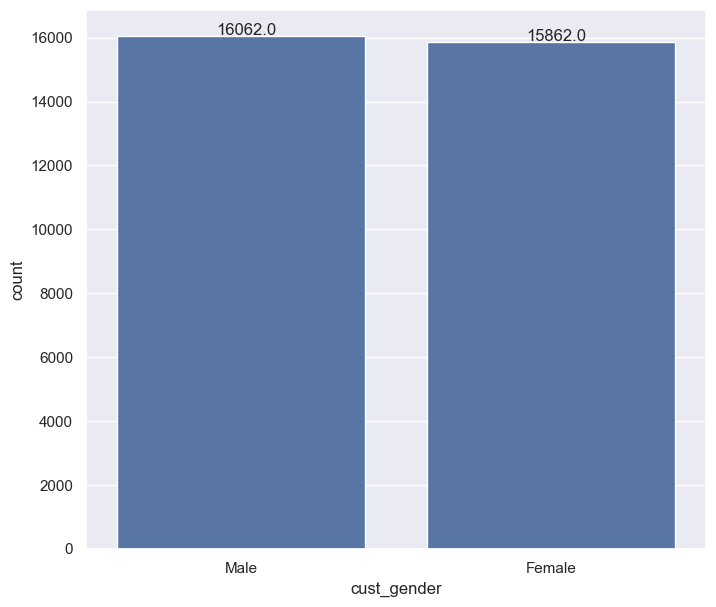

In [14]:
univariate(dataset,'merchandize_category',1)
univariate(dataset,'Order_tyPe',1)
univariate(dataset,'used_coupon',1)
univariate(dataset,'card_vendor',1)
univariate(dataset,'product_discounted',1)
univariate(dataset,'cust_gender',1)

### Insights feom categorical variable analysis

- The distribution of gender between male and less is more or less equal.

- Merchandize category is predominately breakfast, whilst most order types are classified as others.

- Majority of transactions did not use coupons.

- Majority of transactions use Visa as the card vendor, and the majority of transactions do not have a product discount.

## Bi-variate/Multivariate Analysis

### Coorelation Matrix

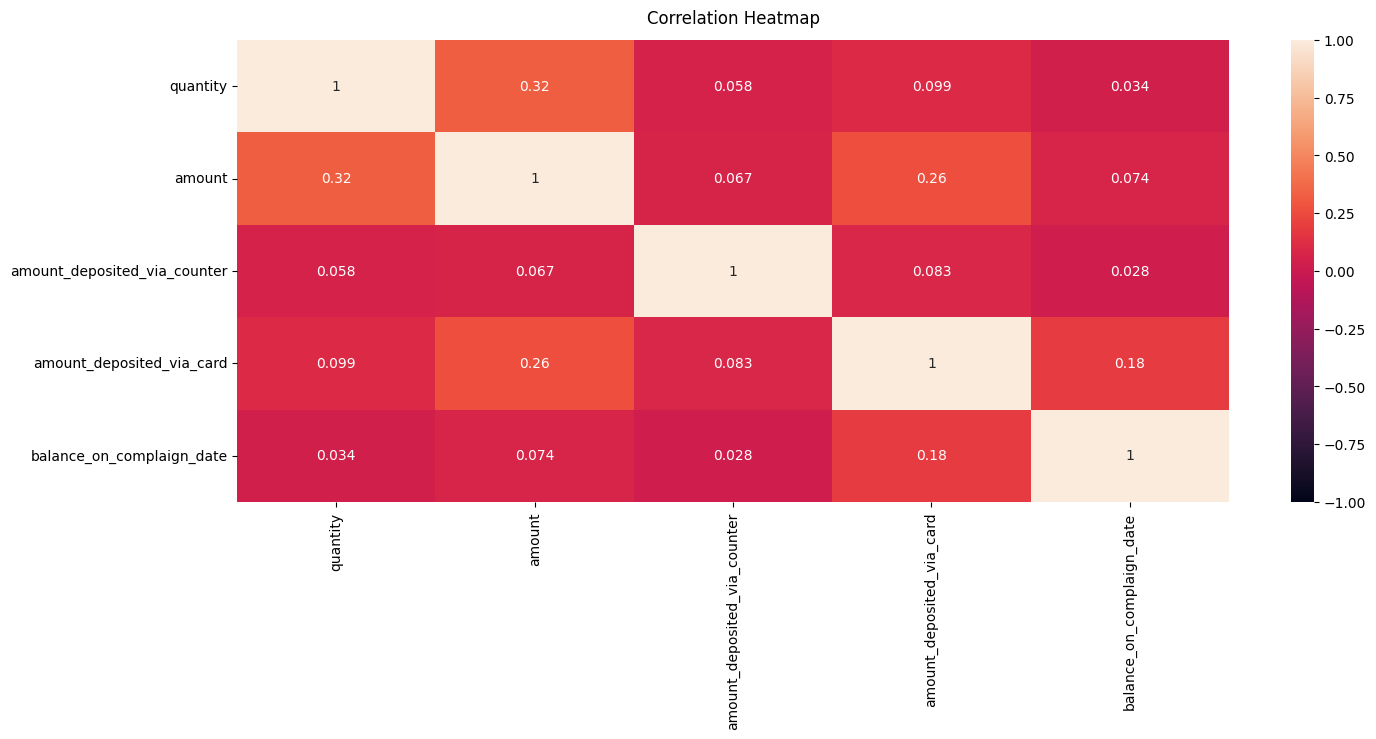

In [6]:
numerical_variables = ['quantity', 'amount', 'amount_deposited_via_counter', 'amount_deposited_via_card', 'balance_on_complaign_date']

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(filtered_dataset[numerical_variables].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Insights from correlation matrix
There are weak positive correlations between the following variables: amount, quantity, and amount deposited via card. Moreover there is a weak negative correlation between amount and amount deposited via counter; which is interesting because in theory one could reasonably expect a strong relationship  between the varaibles, as amount deposited, menas (in genral) we can expect increases in amount deposited via counter.

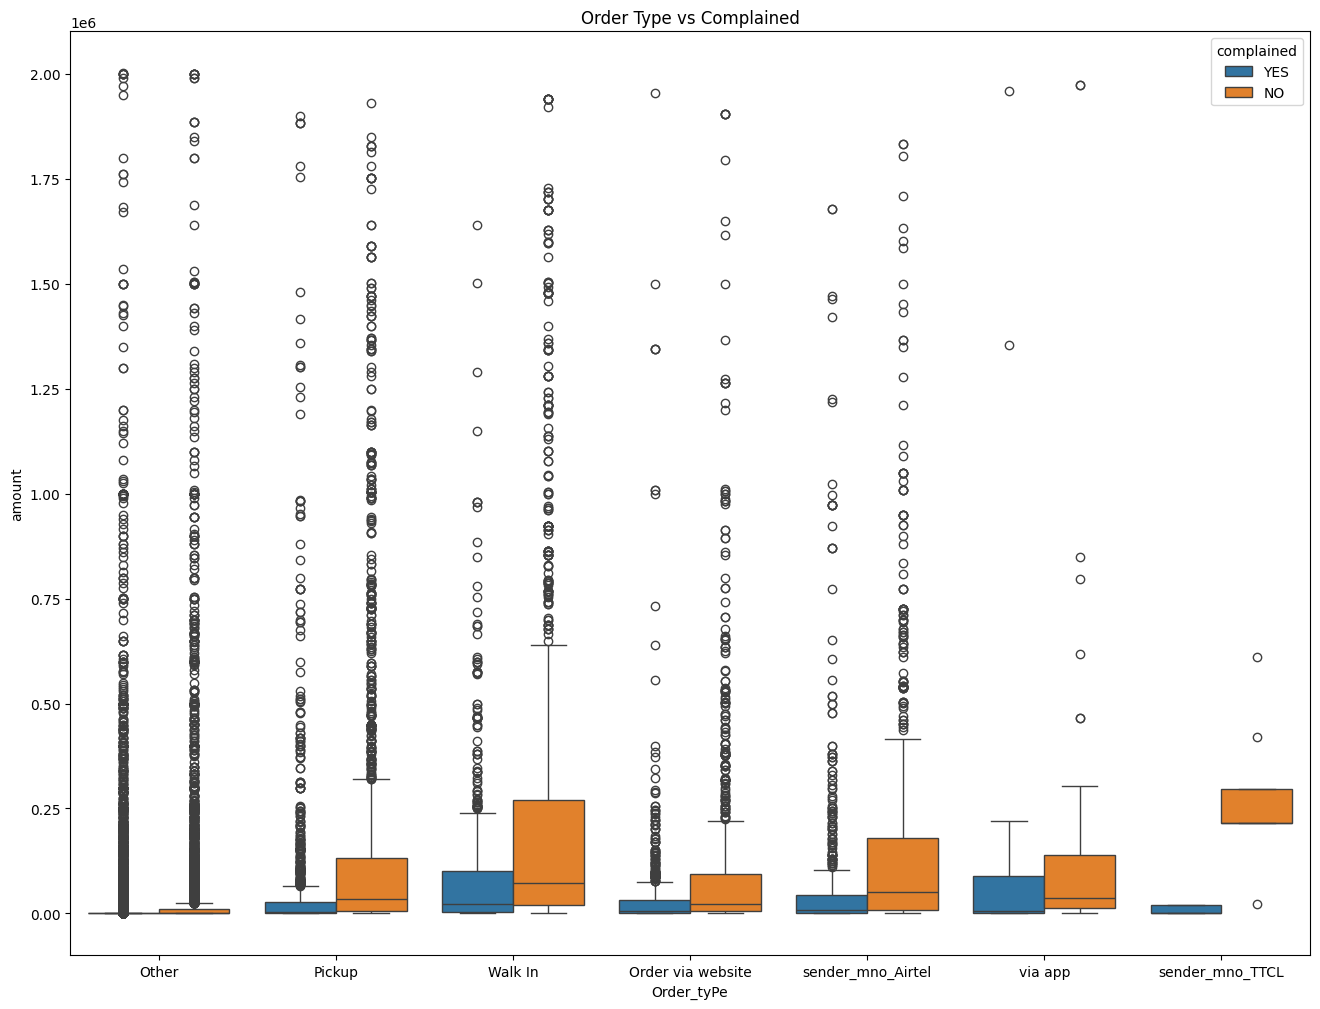

In [7]:
plt.figure(figsize=(16,12))
sns.boxplot(data =filtered_dataset, x='Order_tyPe', y='amount', hue ='complained')
plt.title('Order Type vs Complained')
plt.show()

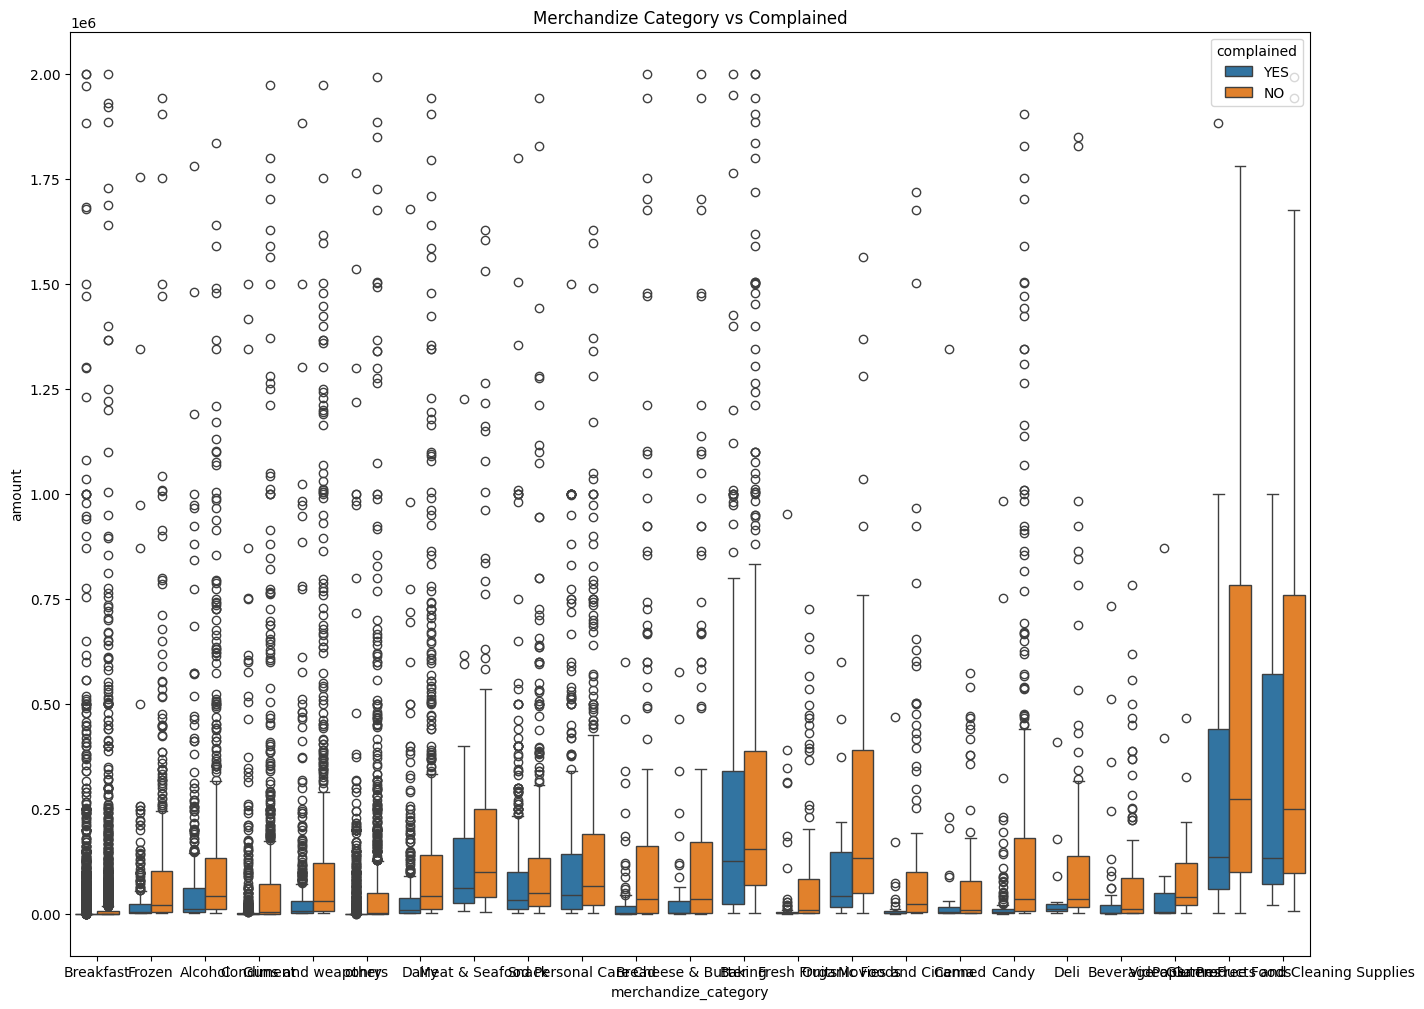

In [8]:
plt.figure(figsize=(16,12))
sns.boxplot(data =filtered_dataset, x='merchandize_category', y='amount', hue ='complained')
plt.title('Merchandize Category vs Complained')
plt.show()

# Feature Engineering

In [9]:
missing_values = filtered_dataset.isnull().sum()

# To check the total number of rows with missing values, you can use:
total_rows_with_missing = filtered_dataset[filtered_dataset.isnull().any(axis=1)].shape[0]

# Print the result
print("Number of missing values in each column:")
print(missing_values)

print("\nTotal number of rows with missing values:", total_rows_with_missing)

Number of missing values in each column:
customer_registration_number       0
merchandize_category            4695
amount_deposited_via_counter       0
amount_deposited_via_card          0
balance_on_complaign_date          0
transaction_date                   0
complaint_date                     0
restaurant_points                  0
fuel_points                        0
groceries_points                   0
toys_points                        0
cash_back_points                   0
electronics                        0
complained                         0
Order_tyPe                         0
amount                             0
quantity                         235
card_vendor                        0
used_coupon                        0
product_discounted                 0
cust_age                           0
cust_gender                        0
dtype: int64

Total number of rows with missing values: 4895


- There are currently 5469 data points with null values, from a total of 31924 data points (approximately 17% of the data points).
## Handling Missing values

### merchandize_category
Given the majority of missing values come from the merchandize category, I have decided to introduce a new category (Unknown) to represent missing values.

### amount and quantity
Given these variables are numeriacal, and represent a small portion of the data in temrs of missing values, I have decided to replace the missing values with the mean (i.e. imputation with the mean)

In [11]:
# Imputation with the mean for the 'amount' and 'quantity' column
filtered_dataset['amount'].fillna(filtered_dataset['amount'].mean(), inplace=True)
filtered_dataset['quantity'].fillna(filtered_dataset['quantity'].mean(), inplace=True)

# Creating a new category for missing values
filtered_dataset['merchandize_category'].fillna('Unknown', inplace=True)

In [12]:
# Check for any remaining missing values
remaining_missing_values = filtered_dataset.isnull().sum()
print("Remaining missing values:\n", remaining_missing_values)

Remaining missing values:
 customer_registration_number    0
merchandize_category            0
amount_deposited_via_counter    0
amount_deposited_via_card       0
balance_on_complaign_date       0
transaction_date                0
complaint_date                  0
restaurant_points               0
fuel_points                     0
groceries_points                0
toys_points                     0
cash_back_points                0
electronics                     0
complained                      0
Order_tyPe                      0
amount                          0
quantity                        0
card_vendor                     0
used_coupon                     0
product_discounted              0
cust_age                        0
cust_gender                     0
dtype: int64


## Date variables

- Introduce a new feature to the dataset that contains the day (e.g. Monday, Thursday, Sunday, etc) of the transaction.

In [13]:
# Convert 'transaction_date' and 'complaint_date' to datetime format
filtered_dataset['transaction_date'] = pd.to_datetime(filtered_dataset['transaction_date'])
filtered_dataset['complaint_date'] = pd.to_datetime(filtered_dataset['complaint_date'])

# Feature: Day of the week as actual day name
filtered_dataset['transaction_day'] = filtered_dataset['transaction_date'].dt.strftime('%A')

In [14]:
filtered_dataset['transaction_day'].unique()


array(['Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

## Standerdise Numeric variables

- From the EDA, it was clear that the data is not normally distributed, therefore I will use the *RobustScaler* from the scikit-learn module because it scales features using the interquartile range (IQR) and the median, making it less sensitive to outliers.

In [15]:
# Create a RobustScaler instance
scaler = RobustScaler()

# Fit the scaler on the selected columns and transform the data
filtered_dataset[numeric_columns] = scaler.fit_transform(filtered_dataset[numeric_columns])

## Total points
- Total points is a new feature that is a summation of the following variables: restaurant_points, fuel_points, groceries_points, toys_points, and cash_back_points.

In [16]:
filtered_dataset['total_points'] = filtered_dataset['restaurant_points'] + filtered_dataset['fuel_points'] + filtered_dataset['groceries_points'] + filtered_dataset['toys_points'] + filtered_dataset['cash_back_points']

In [17]:
filtered_dataset.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,...,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender,transaction_day,total_points
0,64257fd79a53006421b72c3f,Breakfast,0.00,-0.05,-0.03,2023-03-15,2023-03-29,0,0,0,...,Other,0.00,0.00,Visa,No,no,49,Female,Wednesday,0
1,64257ffc9a53006421b72c40,Frozen,0.00,-0.05,-0.03,2023-03-15,2023-03-29,0,1,0,...,Pickup,0.15,0.00,Visa,No,no,82,Female,Wednesday,1
2,642580229a53006421b72c41,Alcohol,0.00,4.66,1.76,2023-03-15,2023-03-29,0,0,0,...,Walk In,1.10,0.00,Visa,No,no,35,Male,Wednesday,1
6,642580659a53006421b72c43,Breakfast,0.00,0.96,-0.01,2023-03-15,2023-03-29,0,0,0,...,Other,0.00,0.00,Visa,No,no,81,Female,Wednesday,0
7,642580659a53006421b72c43,Condiment,0.00,0.96,-0.01,2023-03-15,2023-03-29,0,0,0,...,Other,0.00,0.00,Visa,No,no,81,Female,Wednesday,0


## Label Encoding

- I have decided to use One Hot encoding to represent each category in categorical variables (except for complained) as binary variables.
- Encode the target variable as 0 & 1.

In [18]:
categorical_columns = ['merchandize_category', 'Order_tyPe', 'card_vendor', 'used_coupon', 'product_discounted', 'cust_gender','transaction_day']

# Apply one-hot encoding
filtered_dataset = pd.get_dummies(filtered_dataset, columns=categorical_columns, prefix=categorical_columns, drop_first=True)

In [19]:
filtered_dataset.head()

,customer_registration_number,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,...,card_vendor_Visa,used_coupon_Yes,product_discounted_no,cust_gender_Male,transaction_day_Monday,transaction_day_Saturday,transaction_day_Sunday,transaction_day_Thursday,transaction_day_Tuesday,transaction_day_Wednesday
0,64257fd79a53006421b72c3f,0.00,-0.05,-0.03,2023-03-15,2023-03-29,0,0,0,0,...,True,False,True,False,False,False,False,False,False,True
1,64257ffc9a53006421b72c40,0.00,-0.05,-0.03,2023-03-15,2023-03-29,0,1,0,0,...,True,False,True,False,False,False,False,False,False,True
2,642580229a53006421b72c41,0.00,4.66,1.76,2023-03-15,2023-03-29,0,0,0,0,...,True,False,True,True,False,False,False,False,False,True
6,642580659a53006421b72c43,0.00,0.96,-0.01,2023-03-15,2023-03-29,0,0,0,0,...,True,False,True,False,False,False,False,False,False,True
7,642580659a53006421b72c43,0.00,0.96,-0.01,2023-03-15,2023-03-29,0,0,0,0,...,True,False,True,False,False,False,False,False,False,True


In [20]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30101 entries, 0 to 31923
Data columns (total 56 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   customer_registration_number                               30101 non-null  object        
 1   amount_deposited_via_counter                               30101 non-null  float64       
 2   amount_deposited_via_card                                  30101 non-null  float64       
 3   balance_on_complaign_date                                  30101 non-null  float64       
 4   transaction_date                                           30101 non-null  datetime64[ns]
 5   complaint_date                                             30101 non-null  datetime64[ns]
 6   restaurant_points                                          30101 non-null  int64         
 7   fuel_points                         

# Model Building

- This section explores several machine learning models to build on the *filtered_dataset*. The focus will be on three supervised model: Logistic Regression, Random Forest, and Support Vector Machines (SVMs).

In [21]:
# Split the data into training and testing sets
X = filtered_dataset.drop(['complained', 'customer_registration_number', 'transaction_date', 'complaint_date'], axis=1)
y = filtered_dataset['complained']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Define models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = make_pipeline(RobustScaler(), SVC(random_state=42))

# Train models on the training set
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Evaluate models on the testing set
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Print confusion matrices
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("Logistic Regression Confusion Matrix:")
print(logistic_conf_matrix)
print("\nRandom Forest Confusion Matrix:")
print(random_forest_conf_matrix)
print("\nSVM Confusion Matrix:")
print(svm_conf_matrix)

# Print classification reports
logistic_classification_report = classification_report(y_test, logistic_predictions)
random_forest_classification_report = classification_report(y_test, random_forest_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print("\nLogistic Regression Classification Report:")
print(logistic_classification_report)
print("\nRandom Forest Classification Report:")
print(random_forest_classification_report)
print("\nSVM Classification Report:")
print(svm_classification_report)

Logistic Regression Confusion Matrix:
[[1669 1799]
 [ 612 4951]]

Random Forest Confusion Matrix:
[[2352 1116]
 [ 785 4778]]

SVM Confusion Matrix:
[[ 359 3109]
 [ 292 5271]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.48      0.58      3468
           1       0.73      0.89      0.80      5563

    accuracy                           0.73      9031
   macro avg       0.73      0.69      0.69      9031
weighted avg       0.73      0.73      0.72      9031


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      3468
           1       0.81      0.86      0.83      5563

    accuracy                           0.79      9031
   macro avg       0.78      0.77      0.77      9031
weighted avg       0.79      0.79      0.79      9031


SVM Classification Report:
              precision    recall  f1-score   support

      

## Initial Results
From the results above: 

- Random Forest outperforms both Logistic Regression and SVM in terms of overall accuracy and a balance between precision and recall.
- For this particular case, it is important to minimise false negatives. False negatives is a situation where the model predicts a customer did not complain, but they actually do. It is important to minimise false negatives because the aim is to contact individuals with high likelihood of making a complaint.

## Model Improvements

- This section of the workbook explores using: hyperparameter tuning, regularization, and cross validation to improve the model's pperformance.

### Applying Cross Validation to Logistic Regression

In [30]:
logistic_model = LogisticRegression(random_state=42)

logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=10, scoring='accuracy')

logistic_model.fit(X_train, y_train)

# Print the average cross-validation score for Logistic Regression
print(f'Average Cross-Validation Accuracy for Logistic Regression: {logistic_cv_scores.mean():.4f}')

# Evaluate models on the testing set
logistic_accuracy = logistic_model.score(X_test, y_test)

# Step 6: Print accuracy scores
print(f'Logistic Regression Accuracy on Test Set: {logistic_accuracy:.4f}')

Average Cross-Validation Accuracy for Logistic Regression: 0.7260
Logistic Regression Accuracy on Test Set: 0.7283


### Random Forest Hyperparameter tuning

The following hyperparameters are tuned using random search method:
* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [ ]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
random_forest_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(random_forest_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
random_forest_accuracy = rf_grid_search.score(X_test, y_test)

print(f'Random Forest Accuracy on Test Set: {random_forest_accuracy:.4f}')
print(f'Best Random Forest Hyperparameters: {rf_grid_search.best_params_}')

### SVM Hyperparameter Tuning

- C (Regularization Parameter):This parameter trades off correct classification of training points against maximization of the decision function's margin. Smaller values specify stronger regularization.

- kernel (Kernel Function):
1. 'linear': Linear kernel (for linearly separable data).
2. 'poly': Polynomial kernel.
3. 'rbf': Radial basis function (Gaussian) kernel.

- degree (Degree of the Polynomial Kernel): Only relevant when the kernel is set to 'poly'. It represents the degree of the polynomial kernel function.

- gamma (Kernel Coefficient): This parameter defines how far the influence of a single training point reaches. Low values mean far, and high values mean close. The choice of gamma can significantly impact the performance of the SVM.

In [ ]:
# SVM Hyperparameter Tuning
svm_param_grid = [
    {'C': [0.1, 1, 10], 'kernel': ['linear']},
    {'C': [0.1, 1, 10], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 1, 'scale', 'auto']}
]
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_grid_search = GridSearchCV(svm_model, param_grid=svm_param_grid, cv=10, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)
svm_accuracy = svm_grid_search.score(X_test, y_test)

print(f'SVM Accuracy on Test Set: {svm_accuracy:.4f}')
print(f'Best SVM Hyperparameters: {svm_grid_search.best_params_}')

# Conclusion

- The aim of this workbook was to build a machine learning (specifically supevised learning) model to predict whether a customer will complain by the end of the month or not.

- We first took a look at the shape of the data, and did some basic cleaning. Next, we performed some EDA, where it was discovered that the numerical variables: amount, amount_deposited_via_counter & amount_deposited_via_card contained several outliers. To address this, I applied a threhsold based on percentile. Next, we explored the categorical variables. The target variable *contained* had more yes responses; however not enough to apply asmpling techniques that deal with an inbalance dataset. A majority of order types were Other, and most merchants fell under the Breakfast category. Visa was the most used card vendor, whilst there was a somewhat even split between male and female transaction data.

- This workbook also explored different feature ngineering techniques:

1. First, I handled missing data. For merchandize_category variable, I created a new category called Unknown. Applying imputation by mode did not seem appropriate as this variable had a considerable amount of missing values. For the categories amount and quantity, I applied the imputaiton by mean method.

2. There were a couple of date variables in the dataset, hence I engineered a new feature called transaction_day, which basically identifies the day (e.g. Monday, Thursday, etc) fo the transaction.

3. I standerdised numerical variables using the RobustScaler() class given the distribution of the numerical variables do not follow a normal distribution.

4. Total Points: This feature is the summation of the different point features.

5. I used one hot encoding for all categorical variables, whilst for the target variable, I encoded them using 0 (to indicate No) and 1 (to indicate Yes).

- Next, for the model building section, I used three supervised models: Logistic Regression Model, Random Forest, and SUpport Vector Machine (SVM). From the three models, Random forest perfomed the best.

- Logistic Regression Accuracy on Test Set: 0.7283
- Random Forest Accuracy on Test Set: 0.7912
- SVM Accuracy on Test Set: 0.6236

- At the time of writing my conclusion, I am still waiting for the results of the hyperparamter tuned models, to assess if cross-validation, and hyperparameter tuning would improve the models' performances.

To conclude:
1. Random Forest outperforms both Logistic Regression and SVM in terms of overall accuracy and a balance between precision and recall.

2. Given that minimizing false negatives is more critical, the focus should be on selecting a model that achieves a high recall for the positive class (complained, class 1) while maintaining a reasonable precision. Let's analyze the recall values for the positive class in each model:
    - Logistic Regression:
    Recall for class 1: 0.89
    - Random Forest:
    Recall for class 1: 0.86
    - SVM:
    Recall for class 1: 0.95

3. Among the models, SVM achieves the highest recall for the positive class, indicating that it is better at identifying customers who actually complained. However, it's important to note that SVM has a trade-off, as indicated by the lower precision for class 1.

4. Given that minimizing false negatives (identifying all actual complaints) is the top priority, SVM appears to be the better choice due to its higher recall for the positive class.

5. Steps to improve the SVM model:
    - a. Explore fine-tuning the SVM model or experimenting with different kernels and hyperparameters.
    - b. Consider gathering more data or exploring other features that could enhance the model's performance in identifying complaints.